## Plot Figures 1-4

These depict the input data , preprocessing, SpecUFEx workflow

For Sawi et al., 2021

In [1]:
startInd = topF = 0
cat0 = []
print(f"{startInd+topF} is larger than cluster size (n={len(cat0)})")

0 is larger than cluster size (n=0)


In [2]:
import os

import sys


import h5py

import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

from matplotlib import cm

import matplotlib.gridspec as gridspec

import matplotlib.image as mpimg

from scipy.io import loadmat


import datetime as dtt

import datetime




sys.path.append('.')
sys.path.append('../src/visualization/')

import paths



from functions2 import dateToEventID, getDailyTempDiff, getFeatures, getLocationFeatures,getNMFOrder,resortByNMF,getSpectra_fromWF,getSgram,PCAonFP,calcSilhScore,getSpectraMedian,CalcDiffPeak,PVEofPCA,getTopFCat,calcFFT, getWF, swapLabels,trimSpectra, KMeansSpectra, compileSpectraFromWF
import figureFunctions2



In [3]:


from functions2 import getFeatures, getLocationFeatures,getNMFOrder,resortByNMF,getSpectra_fromWF,getSgram
from functions2 import PCAonFP,calcSilhScore,getDailyTempDiff,getSpectraMedian,CalcDiffPeak,PVEofPCA,getTopFCat 
from functions2 import catMergeFromH5, swapLabels, calcFFT, getWF, swapLabels,trimSpectra, KMeansSpectra, compileSpectraFromWF
import figureFunctions2

## Set paths

In [4]:
#%% load project variables: names and paths
# key = sys.argv[1]

key = "BB_Gorner_Event_Final_v11_J8"
keyN = "BB_Gorner_Cont_Final_v10_J8"


filetype = '.gse2'     
filetypeN = '.sac' 


p = paths.returnp(key)
pN = paths.returnp(keyN)

#%%

projName        = p['projName']
datasetID       = p['datasetID']
projName        = p['projName']
station         = p['station']
channel         = p['channel']
path_top        = p['path_top']
path_proj       = p['path_proj']
outfile_name    = p['outfile_name']
dataFile_name   = p['dataFile_name']
path_WF         = p['path_WF']
path_Cat        = p['path_Cat'] #original, raw catalog
subCatalog_Name = f"{dataFile_name}_Sgrams_Subcatalog.hdf5"



pathFP          = f'{path_top}{projName}/03_output/{station}/SpecUFEx_output/step4_FEATout/'
pathACM         = f'{path_top}{projName}/03_output/{station}/SpecUFEx_output/step2_NMF/'
pathSTM         = f'{path_top}{projName}/03_output/{station}/SpecUFEx_output/step4_stateTransMats/'
pathEB          = f'{path_top}{projName}/02_src/02_SpecUFEx/EB.mat'
pathElnB          = f'{path_top}{projName}/02_src/02_SpecUFEx/ElnB.mat'
pathW        = path_proj + '02_src/02_SpecUFEx/out.DictGain.mat' 


# pathClusCat = path_proj + f"principalDf_full_{mode}_Kopt{Kopt}.csv"
dataH5_path = path_proj + dataFile_name


projNameN        = pN['projName']
datasetIDN       = pN['datasetID']
projNameN        = pN['projName']
station          = pN['station']
channel          = pN['channel']


path_top         = pN['path_top']
path_projN       = pN['path_proj']
outfile_nameN    = pN['outfile_name']
dataFile_nameN   = pN['dataFile_name']
path_WFN         = pN['path_WF']
path_CatN        = pN['path_Cat'] #original, raw catalog
subCatalog_NameN = f"{dataFile_name}_Sgrams_Subcatalog.hdf5"


pathACMN         = f'{path_top}{projNameN}/03_output/{station}/SpecUFEx_output/step2_NMF/'
pathSTMN         = f'{path_top}{projNameN}/03_output/{station}/SpecUFEx_output/step4_stateTransMats/'
pathEBN          = f'{path_top}{projNameN}/02_src/02_SpecUFEx/EB.mat'
pathElnBN        = f'{path_top}{projNameN}/02_src/02_SpecUFEx/ElnB.mat'
pathWN           = path_projN + '02_src/02_SpecUFEx/out.DictGain.mat' 



# pathClusCatN = path_projN + f"principalDf_full_{mode}_Kopt{KoptN}.csv"
dataH5_pathN = path_projN + dataFile_nameN


pathFig = '../reports/figures/'
pathAuxData = '../data/processed/Garcia/'

## Load auxiliary catalog

In [5]:
## Load auxiliary catalog

gps_station_list = ['24','34','36','37']
gps_df_list = []

for gst in gps_station_list:
    
    
    gps_df = pd.read_csv(f'{pathAuxData}gps_roll{gst}.csv',index_col=0)
    gps_df['datetime'] = [pd.to_datetime(ii) for ii in gps_df.index]
    gps_df['datetime_index'] = [pd.to_datetime(ii) for ii in gps_df.index]
    gps_df = gps_df.set_index('datetime_index')
    
    
    gps_df_list.append(gps_df)


lake_df = pd.read_csv(f'{pathAuxData}lake_df.csv',index_col=0)
lake_df['datetime'] = [pd.to_datetime(ii) for ii in lake_df.index]
lake_df['datetime_index'] = [pd.to_datetime(ii) for ii in lake_df.index]
lake_df = lake_df.set_index('datetime_index')


meteor_df = pd.read_csv(f'{pathAuxData}meteor_df.csv',index_col=0)
meteor_df['datetime'] = [pd.to_datetime(ii) for ii in meteor_df.index]
meteor_df['datetime_index'] = [pd.to_datetime(ii) for ii in meteor_df.index]
meteor_df = meteor_df.set_index('datetime_index')

rain_df = meteor_df.rain


## Define some important times in study period

In [6]:
# timing of lake events 
tstart = dtt.datetime(2007, 6, 13)
tend = dtt.datetime(2007, 7, 23)
calvet = dtt.datetime(2007, 7, 1,13,41,35)
supraDraint = dtt.datetime(2007, 7, 4)
subDraint = dtt.datetime(2007, 7, 7)
drainEndt = dtt.datetime(2007, 7, 15)


## Load original catalogs

In [7]:
cat00 = catMergeFromH5(path_Cat,path_proj,outfile_name)
cat00N = catMergeFromH5(path_CatN,path_projN,outfile_nameN)

1411 events kept, merge sucessful
1521 events kept, merge sucessful


## Load station data

In [8]:
##station data 
stn = pd.read_csv("../data/raw/stnlst.csv",
                  header=None,
                  names=['name','X','Y','Elevation','dX','dY','Depth'])

        
     

## Get experiment parameters from H5 file

In [9]:
#########       #########       #########       #########       #########       #########       #########       #########       

####IQIQIQIQIQIQIQIQI

#########       #########       #########       #########       #########       #########       #########       #########       



with h5py.File(path_proj + dataFile_name,'r') as dataFile:

    lenData = dataFile['processing_info/'].get('lenData')[()]
    fs = dataFile['spec_parameters/'].get('fs')[()]
    
    # fmin = 
    nperseg = dataFile['spec_parameters/'].get('nperseg')[()]
    noverlap = dataFile['spec_parameters/'].get('noverlap')[()]
    nfft = dataFile['spec_parameters/'].get('nfft')[()]


    fmax = dataFile['spec_parameters/'].get('fmax')[()]
    fmax = np.ceil(fmax)
    fmin = dataFile['spec_parameters/'].get('fmin')[()]
    fmin = np.floor(fmin)    
    fSTFT = dataFile['spec_parameters/'].get('fSTFT')[()]
    tSTFT = dataFile['spec_parameters/'].get('tSTFT')[()]
    
    sgram_mode = dataFile['spec_parameters/'].get('mode')[()].decode('utf-8')
    scaling = dataFile['spec_parameters/'].get('scaling')[()].decode('utf-8')
    
    
fs = int(np.ceil(fs))
winLen_Sec = float(nperseg / fs)


#########       #########       #########       #########       #########       #########       #########       #########       

##### NOISENOISENOISENOISENOISE

#########       #########       #########       #########       #########       #########       #########       #########       


with h5py.File(path_projN + dataFile_nameN,'r') as dataFile:

    lenDataN = dataFile['processing_info/'].get('lenData')[()]
    fsN = dataFile['spec_parameters/'].get('fs')[()]
    
    # fminN = 
    npersegN = dataFile['spec_parameters/'].get('nperseg')[()]
    noverlapN = dataFile['spec_parameters/'].get('noverlap')[()]
    nfftN = dataFile['spec_parameters/'].get('nfft')[()]


    fmaxN = dataFile['spec_parameters/'].get('fmax')[()]
    fmaxN = np.ceil(fmaxN)
    fminN = dataFile['spec_parameters/'].get('fmin')[()]
    fminN = np.floor(fminN)    
    fSTFTN = dataFile['spec_parameters/'].get('fSTFT')[()]
    tSTFTN = dataFile['spec_parameters/'].get('tSTFT')[()]
    
    sgram_modeN = dataFile['spec_parameters/'].get('mode')[()].decode('utf-8')
    scalingN = dataFile['spec_parameters/'].get('scaling')[()].decode('utf-8')
    
    
fsN = int(np.ceil(fsN))
winLen_SecN = float(npersegN / fsN)



## Load specufex output

In [10]:

#########       #########       #########       #########       #########       #########       #########       #########       

## specufex output - IQIQIQIQIQIQIQIQIQIQ
 
#########       #########       #########       #########       #########       #########       #########       #########       Wmat = loadmat(pathW)

## specufex parameters
Wmat = loadmat(pathW)
EBmat = loadmat(pathEB)

W = Wmat.get('W1')
EB = EBmat.get('EB')



numPatterns = len(W[1])
Nfreqs = len(W)
numStates = EB.shape[0]



order_swap = getNMFOrder(W,numPatterns)
W_new = resortByNMF(W,order_swap)
EB_new = resortByNMF(EB,order_swap)

RMM = W_new @ EB_new.T

#########       #########       #########       #########       #########       #########       #########       #########       

## specufex output - NOISENOISENOINSENOISE

#########       #########       #########       #########       #########       #########       #########       #########       


WmatN = loadmat(pathWN)
EBmatN = loadmat(pathEBN)

WN = WmatN.get('W1')
EBN = EBmatN.get('EB')



numPatternsN = len(WN[1])
NfreqsN = len(WN)
numStatesN = EBN.shape[0]


order_swapN = getNMFOrder(WN,numPatternsN)
W_newN = resortByNMF(WN,order_swapN)
EB_newN = resortByNMF(EBN,order_swapN)

RMMN = W_newN @ EB_newN.T

## Format day ticks, time plotting

* Central European Time is 2 hours later than UTC (Coordinated Universal Time) 
* Max temp occurs around 16:00 (4pm) local time or, 14:00 (2pm) UTC
* All times in UTC


todo: fix ::


##dummy variable -- just needed to get complete day set -- FIXFIX
clus_clu_perday = cat0.event_ID.resample('D', label='left', closed='right').count()

In [11]:


############################################################
            ##### FORMAT DAY TICKS (ASSUMES NO DAYS SKIPPED?) ######
############################################################
tstart = pd.to_datetime('2007-06-14 00:00:00')
tend   = pd.to_datetime('2007-07-22 00:00:00')



delta_day = 7

##dummy variable -- just needed to get complete day set -- FIXFIX
clus_clu_perday = cat00.event_ID.resample('D', label='left', closed='right').count()

numDays = len(clus_clu_perday)

days_list = [clus_clu_perday.index[i] for i in range(numDays)]


## these have lots of possible text formats
day_labels = [f"{days_list[d].month}-{days_list[d].date().day}" for d in range(0,len(days_list),delta_day)]

day_ticks = [days_list[d] for d in range(0,len(days_list),delta_day)]


# Central European Time is 2 hours later than UTC (Coordinated Universal Time)
##max temp is around 4pm local time or 16:00, in UTC it is 14:00 or 2pm
#all times in UTC
hour_of_approx_max_temp = 14
hourMaxTemp = [dtt.datetime(2007, 6, 14,hour_of_approx_max_temp,0,0) + pd.DateOffset(i) for i in range(0,numDays)]

hour24labels = [str(r) for r in range(0,24)] #UTC

print(day_labels)
############################################################
############################################################

       

['6-14', '6-21', '6-28', '7-5', '7-12', '7-19']


In [12]:
plt.rcParams['image.cmap']='magma'

plt.rcParams.update({'font.size': 8})
colors =cm.Paired(np.array([1,5,7,9,2,4,6,8]))


## when plotting, add a bit of buffer so bars aren't cut off
tlimstart = pd.to_datetime('2007-06-13 12:00:00')
tlimend   = pd.to_datetime('2007-07-22 12:00:00')


lw1=4        
lw2=5
alphaT=1
ylabfont=8
ylabpad =10


plt_kwargs = {'lw1':lw1,
              'lw2':lw2,
              'alphaT':alphaT,
              'ylabfont':ylabfont,
              'ylabpad':ylabpad,
              'colors':colors,
              'scaling':scaling,
              'sgram_mode':sgram_mode,
              'hour24labels':hour24labels,
              'day_ticks':day_ticks,
              'day_labels':day_labels,
              'numDays':numDays,
              'hourMaxTemp':hourMaxTemp,
              'tstart':tlimstart, ## for extending x axis to fit bars
              'tend':tlimend,     ## for extending x axis to fit bars
              'tstartreal':tstart,## actual study bound
              'tendreal':tend     ## actual study bound
             }

In [13]:
## Get 3 "random" events to show 

In [14]:
np.random.seed(30)

N = len(cat00)
NN  = len(cat00N)

Nsub = 3
randID = np.random.choice(cat00.event_ID,size=int(Nsub),replace=False)
randID.sort()
randID
rand_date_list = [pd.to_datetime('200' + evID) for evID in randID]
print(rand_date_list)


np.random.seed(31)

NsubN = 3
randIDN = np.random.choice(cat00N.event_ID,size=int(NsubN),replace=False)
randIDN.sort()
randIDN
rand_date_listN = [pd.to_datetime('200' + evID) for evID in randIDN]

print(rand_date_listN)

[Timestamp('2007-06-18 10:24:07'), Timestamp('2007-06-30 15:33:07'), Timestamp('2007-07-14 14:53:56')]
[Timestamp('2007-06-19 00:37:43'), Timestamp('2007-06-26 11:23:57'), Timestamp('2007-07-18 12:12:27')]


## Specs for figures JGR

In [15]:
#quarter page
width1 = 3.74016
height1 = 4.52756

#full page
width2 = 7.48031
height2 = 9.05512

# Figure 1 - Icequake map with depth 

In [16]:
img = mpimg.imread('/Users/theresasawi/Documents/11_Manuscripts/Sawietal_2021/SawiEtAl_2021/data/external/GarciaEtAl_2019/map_CH.jpeg')


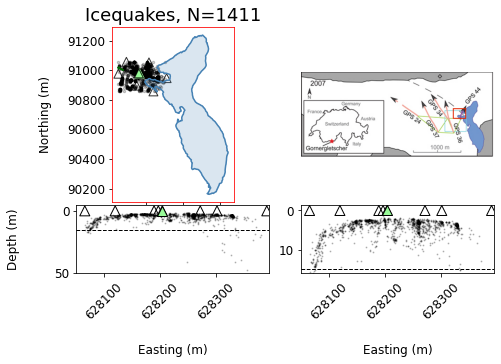

In [17]:
##v2
##settings for yellow bars
plt.rcParams.update({'font.size': 12})




fig,axes = plt.subplots(figsize = (width2,height1))#,sharex=True,constrained_layout=True)
gs = gridspec.GridSpec(7,4)
gs.update(wspace=.4, hspace=0.07)

## Bar plot, Temp and Lake/Precip
ax = plt.subplot(gs[0:5,0:2])
for spine in ax.spines.values():
    spine.set_edgecolor('red')
    
    
figureFunctions2.plotMap(cat00,ax=ax,colorBy='all',size=6,alpha=.2,**plt_kwargs); #'cluster';'all';'datetime'
figureFunctions2.plotStations(stn,station,ax=ax)
ax.set_aspect('equal')
# ax.set_xticks([])
ax.set_xticklabels('')

ax.set_ylabel('Northing (m)',labelpad=15,fontsize=12)

title = f'Icequakes, N={N}'    
ax.set_title(title, pad=6,fontsize=18) 


## flow arrow
x = 628100
y = 91000
dx = -60 / 2
dy = 29 / 2
ax.arrow(x, y, dx, dy,color='darkgreen',width=6,head_length=12)


# #### plot depth and stations 
ax2 = plt.subplot(gs[5:7,0:2])

figureFunctions2.plotDepth(cat00,stn,ax=ax2,byCluster=False,size=1,alpha=.2,stasize=100,**plt_kwargs)    
ax2.set_ylabel('Depth (m)',labelpad=34,fontsize=12)
# ax2.set_xlabel('                                            Easting (m)',labelpad=22,fontsize=12)
ax2.set_xlabel('Easting (m)',labelpad=22,fontsize=12)


ax2.set_ylim(50,-5)
# ax2.set_aspect('1.42')
# ax.text(628100,40,'VE=4',fontsize=10)
ax2.tick_params(axis='x',labelrotation=45)
ax2.axhline(15,color='k',ls='--',lw=1)

# #### plot depth and stations zoomed in
ax2 = plt.subplot(gs[5:7,2:])

figureFunctions2.plotDepth(cat00,stn,ax=ax2,byCluster=False,size=1,alpha=.2,stasize=100,**plt_kwargs)    
ax2.set_ylabel('')
ax2.set_xlabel('Easting (m)',labelpad=22,fontsize=12)

ax2.set_ylim(16,-1.5)
ax2.axhline(15,color='k',ls='--',lw=1)

# ax2.set_aspect('1.42')
# ax.text(628100,40,'VE=4',fontsize=10)
ax2.tick_params(axis='x',labelrotation=45)


ax2 = plt.subplot(gs[1:4,2:])

ax2.imshow(img)
ax2.axis('off')

plt.savefig(pathFig + f'Figure_1.pdf',bbox_inches='tight')


# Figure ?? : just geophysical data

In [18]:
meteor_df.temp

datetime_index
2007-06-14 00:00:00    3.526
2007-06-14 00:57:36    3.427
2007-06-14 01:55:12    4.535
2007-06-14 02:52:48    3.891
2007-06-14 04:04:48    4.283
                       ...  
2007-07-22 18:57:36    8.140
2007-07-22 19:55:12    6.104
2007-07-22 21:07:12    5.605
2007-07-22 22:04:48    5.408
2007-07-22 23:02:24    5.229
Name: temp, Length: 936, dtype: float64

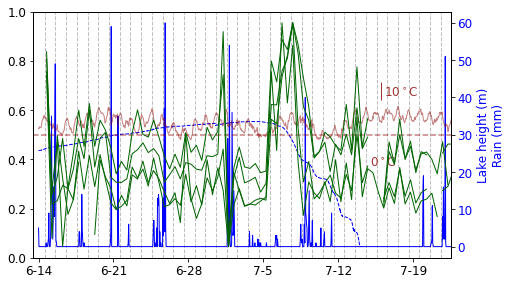

In [19]:
plt.figure(figsize=(width2,height1))
ax = plt.gca()

figureFunctions2.plotLake(lake_df,rain_df,legend=None,ylabel='right',ax=ax,**plt_kwargs)

figureFunctions2.plotTemp(meteor_df.temp,ax=ax,**plt_kwargs)   

for i in range(numDays):
    ax.axvline(hourMaxTemp[i],c='gray',linestyle='--',linewidth=1,alpha=.5)

for gps_dff in gps_df_list:
    figureFunctions2.plotGPS(gps_dff.vel_fill,ylabel='left',ax=ax,**plt_kwargs)

# Figure 2

../src/visualization/functions2.py:320: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  temp_H = meteor_df1.temp.resample('H',loffset='30T').mean().ffill()
../src/visualization/functions2.py:321: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  temp_D = meteor_df1.temp.resample('D',loffset='12H').mean().ffill()


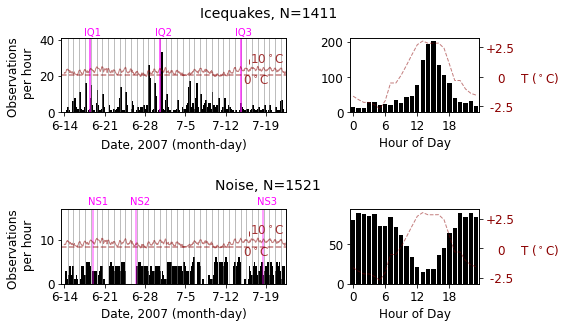

In [20]:

plt.rcParams.update({'font.size': 12})


fig,axes = plt.subplots(figsize = (width2,height1))#,sharex=True,constrained_layout=True)
gs = gridspec.GridSpec(2,5)
gs.update(wspace=2, hspace=1.3)


Kopt=1

tpad = 20
tfont = 14

title = f'                                          Icequakes, N={len(cat00)}'   
XX='IQ'#label for event line
ymax = 41
YY = 42
titleN = f'                                          Noise, N={len(cat00N)}'
XXN='NS'#label for event line
ymaxN = 17
YYN = 18 
dtf = pd.DateOffset(1) #offset pink labels above date bars
dailyTempDiff = getDailyTempDiff(meteor_df,**plt_kwargs)




## Bar plot, Temp and Lake/Precip
ax = plt.subplot(gs[0,0:3])

ax.set_ylim(0,ymax)
ax.set_xlabel('Date, 2007 (month-day)',labelpad=6)
ax.set_xlim(tstart,tend)

figureFunctions2.plotBar(cat00,Kopt,barWidth=.3,timeBin='H',byCluster=False,**plt_kwargs)

figureFunctions2.plotTemp(meteor_df.temp,ax=ax,**plt_kwargs)   

# figureFunctions2.plotLake(garciaDF_3H,ax=ax,ylabel='right',legend=False,**plt_kwargs)

for i in range(numDays):
    ax.axvline(hourMaxTemp[i],c='gray',linestyle='-',linewidth=1,alpha=0.3) 

###plot bars where sgrams were sampled
for i, da in enumerate(rand_date_list):
    ax.axvline(da,c='fuchsia',linestyle='-',linewidth=1.5,alpha=.8) 
    ax.text(da - dtf,YY,f'{XX}{i+1}',color='fuchsia',fontsize=10)#,rotation=90)
    

ax.set_title(title, pad=tpad,fontsize=tfont)
    
## Bar plot, Temp and Lake/Precip
ax = plt.subplot(gs[1,0:3])


ax.set_ylim(0,ymaxN)
ax.set_xlabel('Date, 2007 (month-day)',labelpad=4)
ax.set_xlim(tstart,tend)





figureFunctions2.plotBar(cat00N,1,barWidth=.3,timeBin='H',byCluster=False,**plt_kwargs)

figureFunctions2.plotTemp(meteor_df.temp,ax=ax,**plt_kwargs)   

# figureFunctions2.plotLake(garciaDF_3H,ax=ax,ylabel='right',legend=True,bb1=0,bb2=1.8,**plt_kwargs)


for i in range(numDays):
    ax.axvline(hourMaxTemp[i],c='gray',linestyle='-',linewidth=1,alpha=0.3) 

    
###plot bars where sgrams were sampled
for i, da in enumerate(rand_date_listN):
    
    ax.axvline(da,c='fuchsia',linestyle='-',linewidth=1.5,alpha=.5) 
    ax.text(da - dtf,YYN,f'{XXN}{i+1}',color='fuchsia',fontsize=10)#,rotation=90)
    
ax.set_title(titleN, pad=tpad,fontsize=tfont)

### plot hourly
ax = plt.subplot(gs[0,3:5])


#plot Bars
figureFunctions2.plotHourBar(cat00,1,dailyTempDiff,ax=ax,labelpad=10,**plt_kwargs)

ax = plt.subplot(gs[1,3:5])

#plot Bars
figureFunctions2.plotHourBar(cat00N,1,dailyTempDiff,ax=ax,labelpad=10,**plt_kwargs)


plt.savefig(pathFig + f'Figure_2.pdf',bbox_inches='tight')

## Figure 3 

* Calc full (0-500Hz) means for all spectra


In [21]:
cat00.event_ID

datetime_index
2007-06-14 09:30:58    70614093058
2007-06-14 11:31:25    70614113125
2007-06-14 12:03:56    70614120356
2007-06-14 12:07:17    70614120717
2007-06-14 12:10:58    70614121058
                          ...     
2007-07-21 16:56:23    70721165623
2007-07-21 17:11:34    70721171134
2007-07-21 17:15:16    70721171516
2007-07-21 19:21:46    70721192146
2007-07-21 19:35:14    70721193514
Name: event_ID, Length: 1411, dtype: object

In [25]:
calcSpectra = 1
if calcSpectra:
    list_rand_specMatsum = []
#     for j,evID in enumerate(cat00.event_ID.iloc[0:5]):
    for j,evID in enumerate(cat00.event_ID):
        try:
            specMatsum,specMat,fSTFT2 = getSpectra_fromWF(int(evID),dataH5_path,station,channel,normed=True)

            if j == 0:
                specMatsum_sum = np.zeros(len(specMatsum))
                specMatsum_med = np.zeros(len(specMatsum))

            ax.plot(fSTFT2,specMatsum,alpha=.01,c='darkgray')


            specMatsum_sum += specMatsum

            specMatsum_med = np.vstack([specMatsum_med,specMatsum])
        except:
            continue




    print(j+1)
    specMatsum_mean = specMatsum_sum / (j+1)
    specMatsum_med = np.median(specMatsum_med,axis=0)
    sstd = np.std(specMatsum_med,axis=0)



    list_rand_specMatsumN = []
#     for j,evID in enumerate(cat00N.event_ID.iloc[0:5]):
    for jN,evID in enumerate(cat00N.event_ID):
        
        try:
            specMatsumN,specMatN,fSTFT2N = getSpectra_fromWF(evID,dataH5_pathN,station,channel,normed=True)

            if jN == 0:
                specMatsum_sumN = np.zeros(len(specMatsumN))
                specMatsum_medN = np.zeros(len(specMatsumN))

            ax.plot(fSTFT2N,specMatsumN,alpha=.01,c='darkgray')


            specMatsum_sumN += specMatsumN

            specMatsum_medN = np.vstack([specMatsum_medN,specMatsumN])
        except:
            continue

    print(jN+1)
    specMatsum_meanN = specMatsum_sumN / (jN+1)
    specMatsum_medN = np.median(specMatsum_medN,axis=0)
    sstdN = np.std(specMatsum_medN,axis=0)



1411
1521


* plot

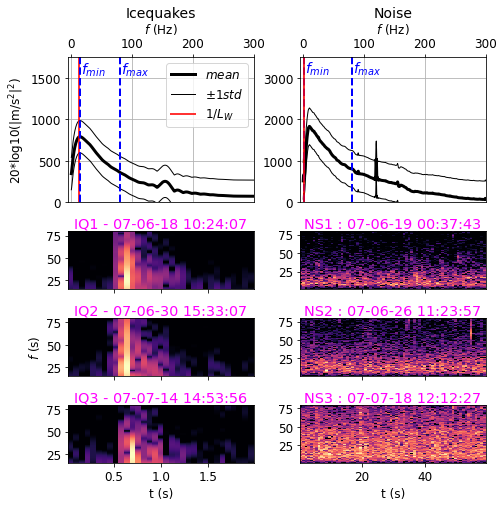

In [26]:
if calcSpectra:
    plt.rcParams.update({'font.size': 12})


    fig,axes = plt.subplots(figsize = (width2,height1*2))#,sharex=True,constrained_layout=True)
    gs = gridspec.GridSpec(6, 6)
    gs.update(wspace=1.5, hspace=.5)


    flabel1 = 1550
    flabel1N = 3120
    FS = 14#font size for fmin and fmax
    ymax = 1750
    ymaxN = 3500

    ## Bar plot, Temp and Lake/Precip
    ax = plt.subplot(gs[0:2,0:3])

    ax.set_ylabel('20*log10(|m/s$^2$|$^2$)')

    ax.plot(fSTFT2,specMatsum_mean,c='k',label='$mean$',lw=3)
    ax.plot(fSTFT2,specMatsum_mean+sstd,c='k',label='$\pm1 std$',lw=1)
    ax.plot(fSTFT2,specMatsum_mean-sstd,c='k',lw=1)

    ax.axvline(x=1/winLen_Sec,color='r',label='$1/L_{W}$',lw=2,alpha=.8)  


    ax.axvline(x=fmin,color='blue',ls='--',lw=2)
    ax.axvline(x=fmax,color='blue',ls='--',lw=2)
    ax.text(fmin+1, flabel1,'$f_{min}$',c='b',fontsize=FS)
    ax.text(fmax+1, flabel1,'$f_{max}$',c='b',fontsize=FS)


    ax.set_xlabel('$f$ (Hz)')
    ax.set_xlim(-5,300)
    ax.set_ylim(0,ymax)

    ax.legend(loc='upper right',bbox_to_anchor=(1,1))
    ax.set_title('Icequakes',pad=tpad,fontsize=tfont)
    ax.xaxis.set_label_position('top') 
    ax.xaxis.tick_top()
    plt.grid()



    for i, evID in enumerate(randID):
        axs = plt.subplot(gs[i+2,0:3],ymargin=.1)

        specMat,x = getSgram(path_proj,evID,station)
        figureFunctions2.plotSgram(specMat,evID,tSTFT,fSTFT,ax=axs)#, **plt_kwargs)
        axs.set_xlabel('t (s)',labelpad=4)
        axs.set_ylabel('$f$ (s)',labelpad=4)

        datte = str(pd.to_datetime('200' + str(evID)).date())[2:]
        timme = str(pd.to_datetime('200' + str(evID)).time())
        plt.title(f'{XX}{i+1} - {datte} {timme}',color='fuchsia',pad=2)

        if i != 2:
    #         axs.set_xticks([]) 
            axs.set_xticklabels('')     
            axs.set_xlabel('')         
        if i != 1:
            axs.set_ylabel('')
    #         axs.set_yticklabels('')
    #         axs.set_yticks([]) 


    ###### NOISE #####

    ## Bar plot, Temp and Lake/Precip
    ax = plt.subplot(gs[0:2,3:])



    ax.plot(fSTFT2N,specMatsum_meanN,c='k',label='$mean$',lw=3)
    ax.plot(fSTFT2N,specMatsum_meanN+sstdN,c='k',label='$\pm1 std$',lw=1)
    ax.plot(fSTFT2N,specMatsum_meanN-sstdN,c='k',lw=1)


    ax.axvline(x=fminN,color='blue',ls='--',lw=2)
    ax.axvline(x=fmaxN,color='blue',ls='--',lw=2)
    ax.text(fminN+2, flabel1N,'$f_{min}$',c='b',fontsize=FS)
    ax.text(fmaxN+2, flabel1N,'$f_{max}$',c='b',fontsize=FS)
    ax.axvline(x=1/winLen_SecN,color='r',label='$1/L_{W}$',lw=2,alpha=.8)  


    ax.set_xlabel('$f$ (Hz)')
    ax.set_xlim(-5,300)
    ax.set_ylim(0,ymaxN)

    # ax.legend(loc='upper right',bbox_to_anchor=(1,1))
    ax.set_title('Noise',pad=tpad,fontsize=tfont)
    ax.xaxis.set_label_position('top') 
    ax.xaxis.tick_top()
    plt.grid()




    for i, evID in enumerate(randIDN):
        axs = plt.subplot(gs[i+2,3:],ymargin=.1)

        specMat,x = getSgram(path_projN,evID,station)
        figureFunctions2.plotSgram(specMat,evID,tSTFTN,fSTFTN,ax=axs)#, **plt_kwargs)
        axs.set_xlabel('t (s)',labelpad=4)
    #     axs.set_ylabel('$f$ (s)',labelpad=4)

        datte = str(pd.to_datetime('200' + str(evID)).date())[2:]
        timme = str(pd.to_datetime('200' + str(evID)).time())
        plt.title(f'{XXN}{i+1} : {datte} {timme}',color='fuchsia',pad=2)

        if i != 2:
    #         axs.set_xticks([]) 
            axs.set_xticklabels('')     
            axs.set_xlabel('')         
    #     if i != 1:
        axs.set_ylabel('')
    #         axs.set_yticklabels('')
    #         axs.set_yticks([]) 


    plt.savefig(pathFig + f'Figure_3.pdf',bbox_inches='tight')

# Figure 4 - SpecUFEx Workflow and Reconstructing Spectra

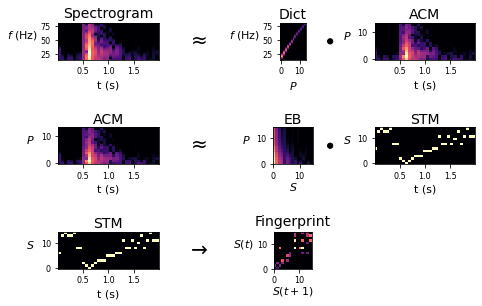

In [27]:
plt.rcParams.update({'font.size': 8})

LFS=11
tpad = 4
tfont=14

evID = randID[0]

fig,axes = plt.subplots(figsize = (width2,height1))#,sharex=True,constrained_layout=True)
gs = gridspec.GridSpec(3,8)
gs.update(wspace=.1, hspace=1.8)



ax = plt.subplot(gs[0,0:2])
specMat,x = getSgram(path_proj,evID,station)
figureFunctions2.plotSgram(specMat,evID,tSTFT,fSTFT,ax=ax)
ax.set_title('Spectrogram',pad=tpad+1,fontsize=tfont)
ax.set_ylabel('$f$ (Hz)',rotation=0,labelpad=18,fontsize=LFS)
ax.set_xlabel('t (s)',fontsize=LFS)


ax = plt.subplot(gs[0,4])
ax.set_title('Dict',pad=tpad,fontsize=tfont)
figureFunctions2.plotW(W_new,numPatterns,fSTFT,aspect=.3,ax=ax)
ax.set_ylabel('$f$ (Hz)',rotation=0,labelpad=18,fontsize=LFS)
ax.set_xlabel('$P$',fontsize=LFS)


ax = plt.subplot(gs[0,6:8])
ax.set_title('ACM',pad=tpad,fontsize=tfont)
figureFunctions2.plotACM(evID, pathACM, order_swap,tSTFT,numPatterns,ax=ax)
ax.set_ylabel('$P$',rotation=0,labelpad=10,fontsize=LFS)
ax.set_xlabel('t (s)',fontsize=LFS)


ax = plt.subplot(gs[1,0:2])
ax.set_title('ACM',pad=tpad,fontsize=tfont)
figureFunctions2.plotACM(evID, pathACM, order_swap,tSTFT,numPatterns,ax=ax)
ax.set_ylabel('$P$',rotation=0,labelpad=10,fontsize=LFS)
ax.set_xlabel('t (s)',fontsize=LFS)




ax = plt.subplot(gs[1,4])
figureFunctions2.plotEB(EB_new,aspect=1,ax=ax)
ax.set_title('EB',pad=tpad,fontsize=tfont)
ax.set_xlabel('$S$',labelpad=0,fontsize=LFS)
ax.set_ylabel('$P$',rotation=0,labelpad=10,fontsize=LFS)




ax = plt.subplot(gs[1,6:8])
figureFunctions2.plotSTM(evID, pathSTM,tSTFT,ax=ax)
ax.set_title('STM',pad=tpad,fontsize=tfont)
ax.set_ylabel('$S$',rotation=0,labelpad=10,fontsize=LFS)
ax.set_xlabel('t (s)',fontsize=LFS)
                 
ax = plt.subplot(gs[2,0:2])
ax.set_title('STM',pad=tpad,fontsize=tfont)
figureFunctions2.plotSTM(evID, pathSTM,tSTFT,ax=ax)
ax.set_ylabel('$S$',rotation=0,labelpad=10,fontsize=LFS)
ax.set_xlabel('t (s)',fontsize=LFS)



#### plot math symbols ###

ax = plt.subplot(gs[0,5])
circle1 = plt.Circle((0.08, 0.5), 0.07, color='k')
ax.add_patch(circle1)
ax.set_aspect('equal')
ax.axis('off')


ax = plt.subplot(gs[1,5])
circle1 = plt.Circle((0.08, 0.5), 0.07, color='k')
ax.add_patch(circle1)
ax.set_aspect('equal')
ax.axis('off')


ax = plt.subplot(gs[0,2])
ax.text(.5,.4,r'$\approx$',fontsize=20)
ax.axis('off')

ax = plt.subplot(gs[1,2])
ax.text(.5,.4,r'$\approx$',fontsize=20)
ax.axis('off')


ax = plt.subplot(gs[2,2])
ax.text(.5,.4,r'$\rightarrow$',fontsize=20)
ax.axis('off')



## plot FP
ax = plt.subplot(gs[2,4])
ax.set_title('Fingerprint',pad=tpad+2,fontsize=tfont)
figureFunctions2.plotFP(path_proj,outfile_name,evID,ax=ax)
ax.set_aspect('equal')
ax.set_ylabel('$S(t)$',rotation=0,labelpad=14,fontsize=LFS)
ax.set_xlabel('$S(t+1)}$',rotation=0,labelpad=0,fontsize=LFS)
# plt.tight_layout()
plt.savefig(pathFig + f'Figure_4.pdf',bbox_inches='tight')